# ANSWER 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
url_data=r'https://raw.githubusercontent.com/astroclubiitk/computational-astrophysics/main/Final-Project/Pleiades_Cluster.csv'
df=pd.read_csv(url_data)
df.head()

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623


In [3]:
plx=df.iloc[0:,3]
print(plx)

0      3.486630
1      8.027063
2      8.509836
3      6.493298
4      2.675075
         ...   
982    5.779793
983    7.226433
984    2.085063
985    1.730391
986    4.196960
Name: plx, Length: 987, dtype: float64


In [4]:
d=1000/plx
l=np.log10(d)
print(l)

0      2.457594
1      2.095443
2      2.070079
3      2.187535
4      2.572664
         ...   
982    2.238088
983    2.141076
984    2.680881
985    2.761856
986    2.377065
Name: plx, Length: 987, dtype: float64


In [5]:
m=df.iloc[0:,0]
print(m)

0      15.684173
1       7.498167
2      16.102013
3      12.923352
4      16.454210
         ...    
982    11.852763
983     8.186488
984    15.502478
985    17.422070
986    11.906063
Name: gmag, Length: 987, dtype: float64


In [6]:
M=m+5-5*l           #calculating absolute magnitude
print(M)

0       8.396202
1       2.020950
2      10.751619
3       6.985679
4       8.590890
         ...    
982     5.662324
983     2.481108
984     7.098074
985     8.612791
986     5.020737
Length: 987, dtype: float64


In [7]:
z=d[np.logical_not(d>200)]
print(np.mean(z))

136.24266048473115


C:\Users\nikit\anaconda3\Lib\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


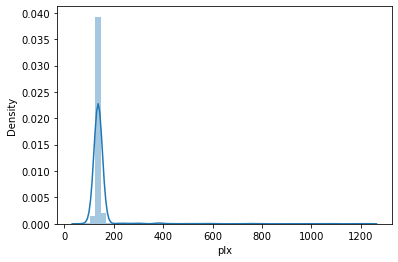

In [8]:
import seaborn as sns
sns.distplot(d,hist=True)
plt.show()

# ANSWER 2

In [9]:
x=(4.77-M)/2.5
print(x)

0     -1.450481
1      1.099620
2     -2.392648
3     -0.886271
4     -1.528356
         ...   
982   -0.356930
983    0.915557
984   -0.931230
985   -1.537116
986   -0.100295
Length: 987, dtype: float64


In [10]:
y=10**x
print(y)      #y=L/Lo which is comparable with lum_val 

0       0.035442
1      12.578243
2       0.004049
3       0.129936
4       0.029624
         ...    
982     0.439613
983     8.232975
984     0.117158
985     0.029032
986     0.793789
Length: 987, dtype: float64


In [11]:
bp_rp=df.iloc[0:,4]
print(bp_rp)

0      2.192428
1      0.188913
2      3.116683
3      1.591153
4      2.346289
         ...   
982    1.404244
983    0.352915
984    1.515169
985    2.049238
986    1.102659
Name: bp_rp, Length: 987, dtype: float64


In [12]:
p=(bp_rp+0.4)**0.67
print(p)

0      1.893143
1      0.701349
2      2.322252
3      1.586354
4      1.967705
         ...   
982    1.484971
983    0.826837
984    1.545535
985    1.822430
986    1.313701
Name: bp_rp, Length: 987, dtype: float64


In [13]:
Tk=5601/p
Tk

0      2958.571887
1      7986.033636
2      2411.883430
3      3530.737696
4      2846.463540
          ...     
982    3771.791500
983    6774.010474
984    3623.988394
985    3073.369566
986    4263.527232
Name: bp_rp, Length: 987, dtype: float64

# ANSWER 3

In [14]:
brightness=np.max(m)-m
brightness
B=brightness.to_numpy(dtype ='float32')
B1=np.extract(B<5, B)
B2=np.extract(B>5, B)
B3=np.extract(B>10, B)
B4=np.extract(B>15,B)
B4

array([16.244747, 15.649019, 15.795212, 16.354755, 16.078896],
      dtype=float32)

In [15]:
df

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623
...,...,...,...,...,...,...,...,...
982,11.852763,56.920869,22.929795,5.779793,1.404244,0.513834,4526.7550,1.165440
983,8.186488,55.930264,24.374396,7.226433,0.352915,7.839014,7963.1953,1.470986
984,15.502478,56.525937,25.112616,2.085063,1.515169,0.141687,4443.0000,0.635280
985,17.422070,57.441505,22.895388,1.730391,2.049238,NaN,NaN,NaN


In [17]:
df.insert(8,'Brightness',B,allow_duplicates=False)
df

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val,Brightness
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938,4.201813
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN,12.387819
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN,3.783973
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230,6.962634
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623,3.431776
...,...,...,...,...,...,...,...,...,...
982,11.852763,56.920869,22.929795,5.779793,1.404244,0.513834,4526.7550,1.165440,8.033223
983,8.186488,55.930264,24.374396,7.226433,0.352915,7.839014,7963.1953,1.470986,11.699498
984,15.502478,56.525937,25.112616,2.085063,1.515169,0.141687,4443.0000,0.635280,4.383508
985,17.422070,57.441505,22.895388,1.730391,2.049238,NaN,NaN,NaN,2.463916


Text(0.5, 1.0, 'Plotting Stars')

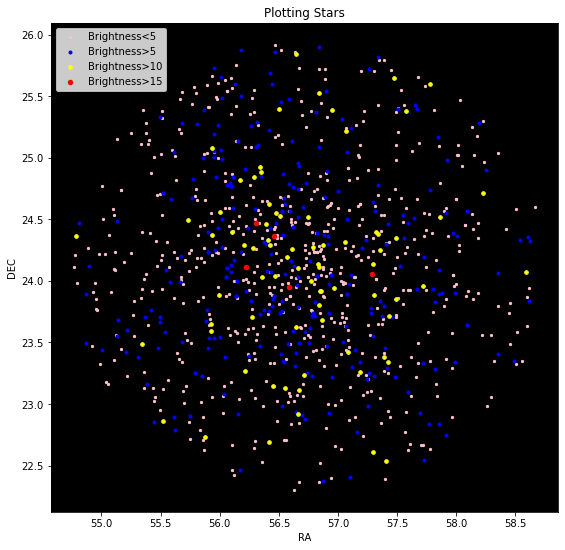

In [20]:
fig=plt.figure(figsize=(20,9))
Figure=fig.add_subplot(121,facecolor='black')
B1=df[df.Brightness<5]
Figure.scatter(B1['ra'],B1['dec'],s=5,c='pink',label='Brightness<5')
B2=df[df.Brightness>5]
Figure.scatter(B2['ra'],B2['dec'],s=9,c='blue',label='Brightness>5')
B3=df[df.Brightness>10]
Figure.scatter(B3['ra'],B3['dec'],s=13,c='yellow',label='Brightness>10')
B4=df[df.Brightness>15]
Figure.scatter(B4['ra'],B4['dec'],s=20,c='red',label='Brightness>15')
plt.legend(loc=2)
Figure.set_xlabel("RA")
Figure.set_ylabel("DEC")
Figure.set_title("Plotting Stars")


# ANSWER 4

In [55]:
bp_rp==df.iloc[0:,4]
colorplot=bp_rp.to_numpy(dtype ='float32')
AbsMag=M.to_numpy(dtype ='float32')
df

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val,Brightness,Absolute Magnitude
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938,4.201813,8.396202
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN,12.387819,2.020950
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN,3.783973,10.751619
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230,6.962634,6.985679
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623,3.431776,8.590890
...,...,...,...,...,...,...,...,...,...,...
982,11.852763,56.920869,22.929795,5.779793,1.404244,0.513834,4526.7550,1.165440,8.033223,5.662324
983,8.186488,55.930264,24.374396,7.226433,0.352915,7.839014,7963.1953,1.470986,11.699498,2.481108
984,15.502478,56.525937,25.112616,2.085063,1.515169,0.141687,4443.0000,0.635280,4.383508,7.098074
985,17.422070,57.441505,22.895388,1.730391,2.049238,NaN,NaN,NaN,2.463916,8.612791


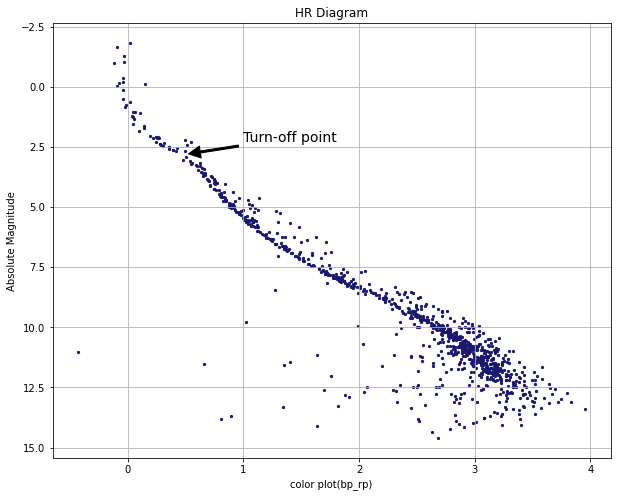

In [86]:
plt.figure(figsize=(10,8))
plt.scatter(colorplot,AbsMag,s=5,c='midnightblue')
plt.annotate('Turn-off point',xy=(0.5,2.8),xytext=(1,2.3),arrowprops = dict(width=2,facecolor ='black',shrink = 0.05),fontsize=14,color='black')
plt.xlabel('color plot(bp_rp)')
plt.ylabel('Absolute Magnitude')
plt.gca().invert_yaxis()
plt.title('HR Diagram')
plt.grid()